In [1]:
import pickle
from canny_cf import *
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
k = 10 # number of latent factors
FNAME = 'data/LasVegas_local.pck'
PROPORTION = .2 # Train to test percentage
ITERS = 20 # Number of times to run EM

with open(FNAME, 'rb') as pickle_file:
    Ycol = pickle.load(pickle_file)
print('Ycol shape: {}'.format(Ycol.shape))

# Split the dataset
Ytest, Ytrain, test_row_ind, test_col_ind  = split_Y(Ycol, PROPORTION)

# Train 
lam_diff, psi_diff, x, Lam = train(Ytrain, k, ITERS)

# Get the correct rows and columns of Lambda and x
x_test, Lam_test = split_others(Ycol, x, Lam, PROPORTION, test_row_ind, test_col_ind)

# Test the result
res = test(Ytest, x_test, Lam_test)
pickle.dump(res, open('data/prediction_difference.pck', 'wb'))
print('\nResults\n===========')
print('Mean of test array: {}'.format(np.mean(abs(res))))
print('Std of test array: {}'.format(np.std(abs(res))))

    

Ycol shape: (28066, 126280)
Ytrain before removing empty: (28066, 126280)
Ytrain after removing empty: (27892, 124574)
Ytest before removing empty: (5439, 23550)
Ytest after removing empty: (3566, 9824)
n=27892
m=124574
k=10
Starting Iterations
evaluating user: 0
evaluating user: 1000
evaluating user: 2000
evaluating user: 3000
evaluating user: 4000
evaluating user: 5000
evaluating user: 6000
evaluating user: 7000
evaluating user: 8000
evaluating user: 9000
evaluating user: 10000
evaluating user: 11000
evaluating user: 12000
evaluating user: 13000
evaluating user: 14000
evaluating user: 15000
evaluating user: 16000
evaluating user: 17000
evaluating user: 18000
evaluating user: 19000
evaluating user: 20000
evaluating user: 21000
evaluating user: 22000
evaluating user: 23000
evaluating user: 24000
evaluating user: 25000
evaluating user: 26000
evaluating user: 27000
evaluating user: 28000
evaluating user: 29000
evaluating user: 30000
evaluating user: 31000
evaluating user: 32000
evaluatin

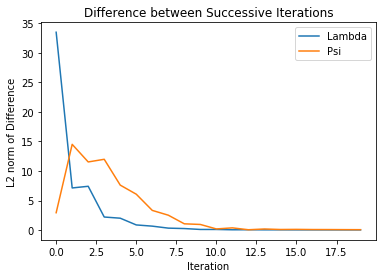

In [162]:
plt.plot(np.arange(ITERS), lam_diff, label='Lambda')
plt.plot(np.arange(ITERS), psi_diff, label="Psi")
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('L2 norm of Difference')
plt.title('Difference between Successive Iterations')
pass